# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [34]:
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split as tts 
from sklearn.model_selection import train_test_split
import pylab as plt
import seaborn as sns

In [35]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Lasso        # regularizacion L1
from sklearn.linear_model import Ridge        # regularizacion L2
from sklearn.linear_model import ElasticNet   # regularizacion L1+L2


# se inician los modelos
linreg=LinReg()
lasso=Lasso()
ridge=Ridge()
elastic=ElasticNet()

from sklearn.svm import SVR  # support vector regressor

svr=SVR()

In [36]:
from sklearn.metrics import mean_squared_error as mse  # error cuadratico medio

## Regression Model Evaluation

In [37]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

c:\Users\David MC\.conda\envs\Ironhack\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [38]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [39]:
X=data.drop(['MEDV'], axis=1)  # separacion X y

X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [40]:
y=data.MEDV

y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

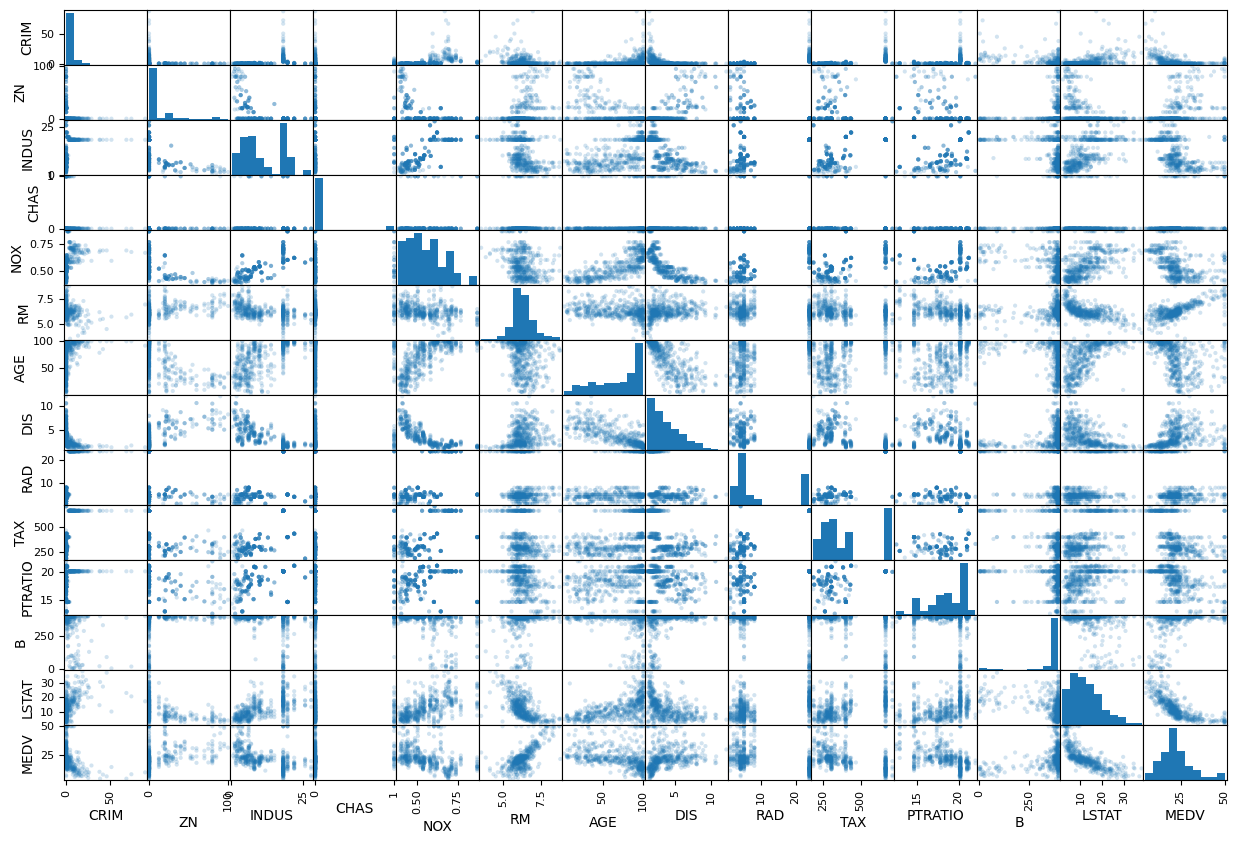

In [41]:
pd.plotting.scatter_matrix(data, figsize=(15, 10), alpha=0.2);

In [42]:
X.shape, y.shape

((506, 13), (506,))

In [43]:
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [44]:
linreg.fit(X_train, y_train)

LinearRegression()

## 3. Calculate and print R-squared for both the training and the testing set.

## 4. Calculate and print mean squared error for both the training and the testing set.

In [45]:
y_pred_test=linreg.predict(X_test)

mse_test=   mse(y_test, y_pred_test, squared=False)    # RMSE squared=False por la raiz cuadrada

In [46]:
y_pred_train=linreg.predict(X_train)

mse_train=  mse(y_train, y_pred_train, squared=False)    # RMSE squared=False por la raiz cuadrada

In [47]:
mse_test, mse_train

(4.557486674063898, 4.747059722420525)

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [48]:
from sklearn.metrics import mean_absolute_error as mae  # estos alias tmb son cosa mia

mae_test=   mae(y_test, y_pred_test)
mae_train=  mae(y_train, y_pred_train)

mae_test, mae_train

(3.425181871853349, 3.332891470689543)

## Classification Model Evaluation

In [49]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [50]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [51]:
X=data.drop(['class'], axis=1)  # separacion X y

y=data['class']

X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [52]:
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [53]:
from sklearn.linear_model import LogisticRegression as LogReg

In [54]:
logreg=LogReg()
logreg.fit(X_train, y_train)

LogisticRegression()

In [55]:
y_pred_test=logreg.predict(X_test)
y_pred_test[:5]

array([0, 2, 1, 2, 1])

In [56]:
y_pred_train=logreg.predict(X_train)
y_pred_train[:5]

array([0, 0, 1, 1, 1])

In [57]:
len(y_pred_test), len(y_pred_train)

(30, 120)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [58]:
logreg.score(X_train, y_train)

0.9666666666666667

In [59]:
logreg.score(X_test, y_test)

0.9333333333333333

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [60]:
from sklearn.metrics import balanced_accuracy_score as balacc

In [61]:
balacc(y_test, y_pred_test)

0.9523809523809524

In [62]:
balacc(y_train, y_pred_train)

0.9648148148148148

## 10. Calculate and print the precision score for both the training and the testing set.

In [63]:
from sklearn.metrics import precision_score as prec


In [64]:
prec(y_test, y_pred_test, average=None)

array([1.        , 0.83333333, 1.        ])

In [65]:
prec(y_train, y_pred_train, average=None)

array([1.        , 0.95      , 0.94444444])

## 11. Calculate and print the recall score for both the training and the testing set.

In [66]:
from sklearn.metrics import recall_score as rec

rec(y_test, y_pred_test, average=None)

array([1.        , 1.        , 0.85714286])

In [67]:
rec(y_train, y_pred_train, average=None)

array([1.        , 0.95      , 0.94444444])

## 12. Calculate and print the F1 score for both the training and the testing set.

In [68]:
from sklearn.metrics import f1_score as f1

f1(y_test, y_pred_test, average=None)

array([1.        , 0.90909091, 0.92307692])

In [69]:
f1(y_train, y_pred_train, average=None)

array([1.        , 0.95      , 0.94444444])

## 13. Generate confusion matrices for both the training and the testing set.

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [71]:
from sklearn.metrics import confusion_matrix as cm

cm(y_test, y_pred_test)

array([[ 6,  0,  0],
       [ 0, 10,  0],
       [ 0,  2, 12]], dtype=int64)

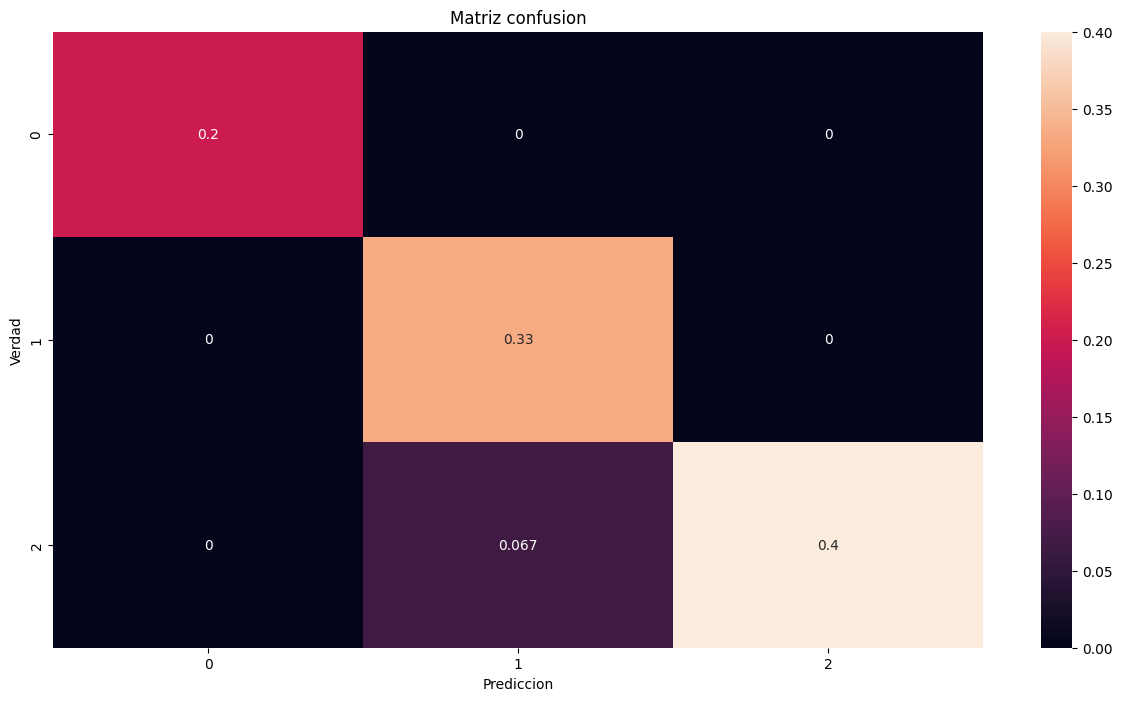

In [72]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred_test)/sum(sum(cm(y_test, y_pred_test))), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

In [73]:
from sklearn.metrics import confusion_matrix as cm

cm(y_train, y_pred_train)

array([[44,  0,  0],
       [ 0, 38,  2],
       [ 0,  2, 34]], dtype=int64)

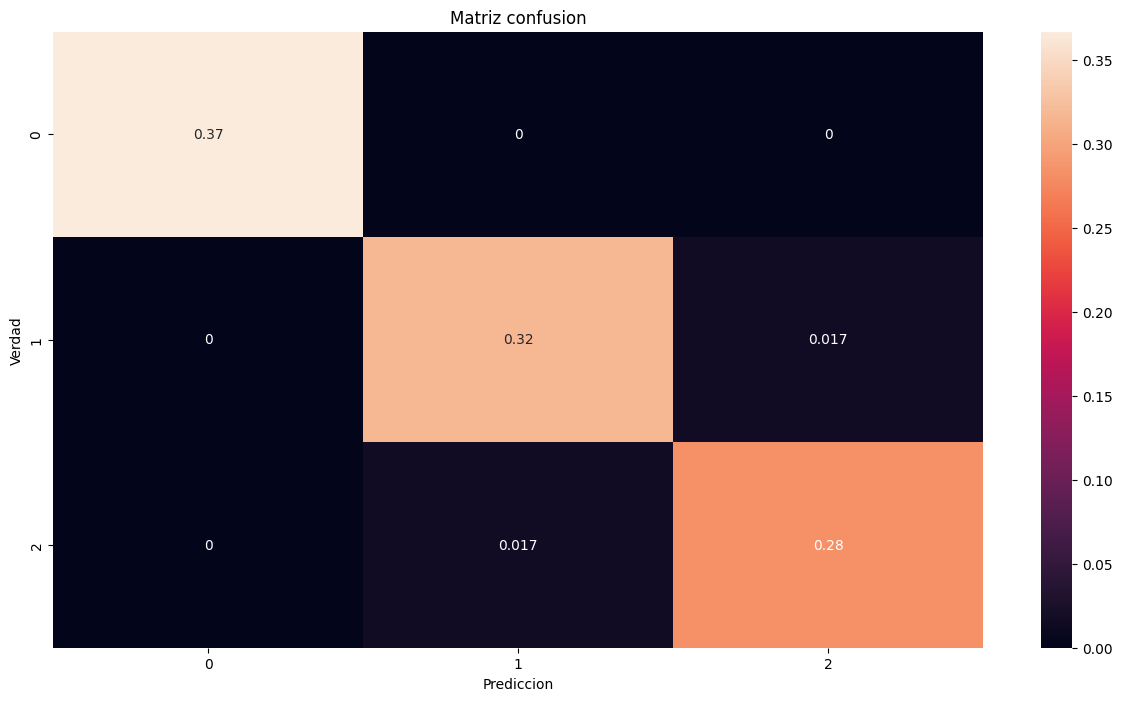

In [74]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_train, y_pred_train)/sum(sum(cm(y_train, y_pred_train))), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.